# Installations

In [4]:
#%pip install tensorflow
#%pip install xgboost
#!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=d2a8674aa4ca434d73e9f7e0030a907fa6558d17e0257a2f47c697dfad46b9bb
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


# Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

# stacking
from sklearn.ensemble import StackingClassifier

# preprocessing
#from feature_engine.discretisation import EqualWidthDiscretiser
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

# deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.neural_network import MLPClassifier

# interpreting the model
#from lime.lime_tabular import LimeTabularExplainer
import lime
from lime.lime_tabular import LimeTabularExplainer
# from lime import lime_tabular

# Saving the model
from joblib import dump, load

%matplotlib inline
plt.style.use('seaborn')

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

# Load Data

In [2]:
# Loading the data
df = pd.read_csv("bank-full.csv",sep=';')

# EDA

In [8]:
# Checking the number of rows and columns in the dataset
df.shape

(45211, 17)

In [9]:
# Preview of the dataset
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [10]:
# Unique values of the column 'poutcome' 
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [11]:
# Unique values of the column 'previous' 
df['previous'].unique()

array([  0,   3,   1,   4,   2,  11,  16,   6,   5,  10,  12,   7,  18,
         9,  21,   8,  14,  15,  26,  37,  13,  25,  20,  27,  17,  23,
        38,  29,  24,  51, 275,  22,  19,  30,  58,  28,  32,  40,  55,
        35,  41])

In [12]:
# Unique values of the column 'campaign' 
df['campaign'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

In [13]:
# Unique values of the column 'contact' 
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [14]:
# Dropping the null datasets
df.dropna(inplace=True)

In [15]:
# Dropping the duplicates in datasets
df.drop_duplicates

<bound method DataFrame.drop_duplicates of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

        

In [16]:
# Checking the datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


There are 6 columns that are numeric 

In [17]:
# Basic statistics for each numeric column
df.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

The average age of the cutomer is 40 years old and the average duration of the call in seconds is 258 seconds

In [18]:
# Basic statistics for each object column
df.describe(include=['O'])

job  marital  education default housing   loan   contact  \
count         45211    45211      45211   45211   45211  45211     45211   
unique           12        3          4       2       2      2         3   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           9732    27214      23202   44396   25130  37967     29285   

        month poutcome      y  
count   45211    45211  45211  
unique     12        4      2  
top       may  unknown     no  
freq    13766    36959  39922

In [19]:
# Checking for missing values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [3]:
# Changing the datatypes
df['job'].astype('category')
df['marital'].astype('category')
df['education'].astype('category')
df['default'].astype('category')
df['housing'].astype('category')
df['loan'].astype('category')
df['contact'].astype('category')
df['day'].astype('category')
df['month'].astype('category')
df['education'].astype('category')
df['poutcome'].astype('category')

0        unknown
1        unknown
2        unknown
3        unknown
4        unknown
          ...   
45206    unknown
45207    unknown
45208    success
45209    unknown
45210      other
Name: poutcome, Length: 45211, dtype: category
Categories (4, object): ['failure', 'other', 'success', 'unknown']

In [21]:
# The data distribution of the label column
df['y'].value_counts(normalize=False)

no     39922
yes     5289
Name: y, dtype: int64

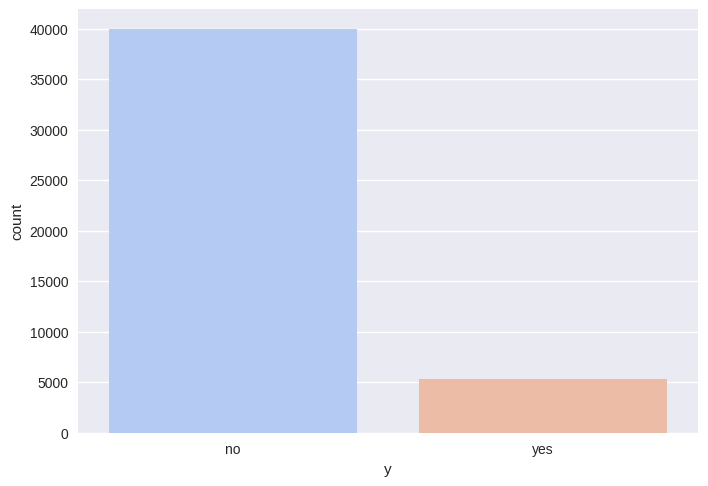

In [22]:
# Plotting the value counts of the label to show the imbalance in dataset
sns.countplot(data=df, x='y', palette='coolwarm');

The yes here showcases that 5289 people subscribed for the fixed deposit and no here showcases that 39922 people non subscried for the fixed deposit 

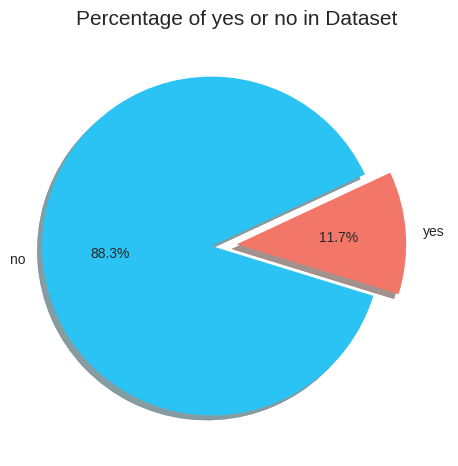

In [23]:
# The distribution of the value counts from the label column in terms of percentage in a pie chart
sizes = df['y'].value_counts(sort=True)
colors = ['#2ac3f3', '#f37768'] 
explode = [0.15, 0]
labels= ['no', 'yes']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=25)
plt.title('Percentage of yes or no in Dataset', fontsize=15)
plt.show();

11.7 % of the people called said 'yes' and subscribed for the fixed deposit, while the remaining 88.3% declined it

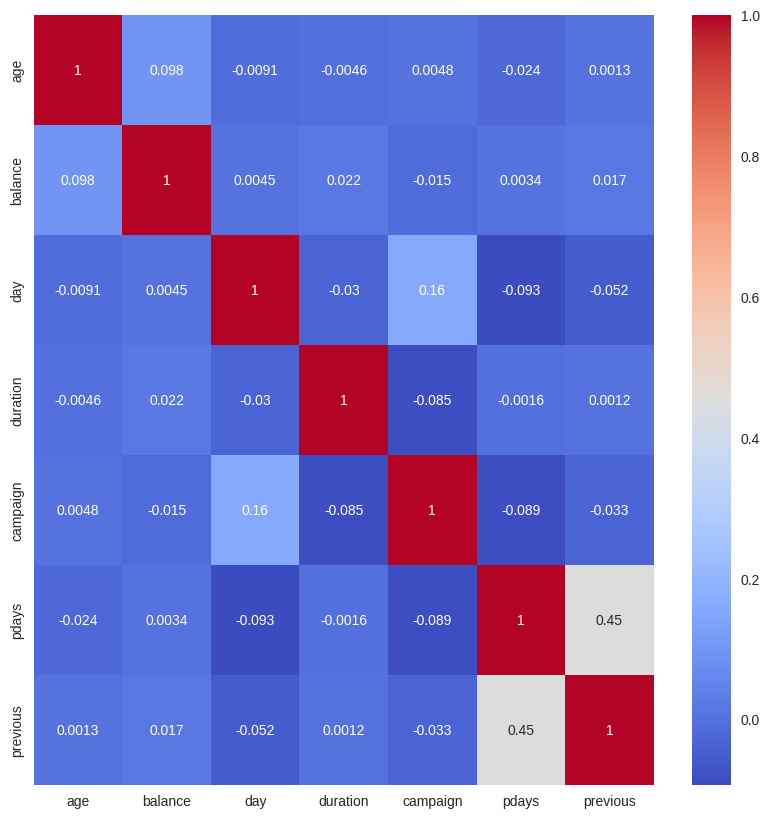

In [24]:
# The chart below shows which one of the columns have strong correlation (effect) on the label 
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', alpha=1.0)
plt.show();

In [6]:
# Encoding the label momentarily for using it below to show which columns affect the label
df['y']=df['y'].apply(lambda x:0 if x=='yes' else 1)

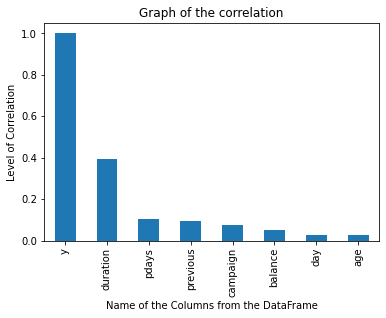

In [14]:
# The graph below shows which columns are strongly affecting or correlating with the label
corr_results = df.corrwith(df['y']).abs().sort_values(ascending=False)
corr_results.plot(kind='bar')
plt.title('Graph of the correlation')
plt.xlabel('Name of the Columns from the DataFrame')
plt.ylabel('Level of Correlation');


In [27]:
# pair plot of each column against all the other columns 
sns.pairplot(df);

In [44]:
# Colours for presentation of the graphs
pres_pal = ['#2ac3f3', '#f37768']

In [52]:
# Distribution of the job and the number of customers
sns.countplot(data=df, x='job', hue='y',  palette=pres_pal)
plt.title('Job and the Number of Customers', fontsize=15);

Text(0.5, 1.0, 'Marital and the Number of Customers')

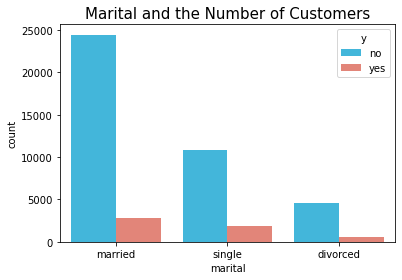

In [51]:
# Distribution of the marital and the number of customers
sns.countplot(data=df, x='marital', hue='y', palette=pres_pal)
plt.title('Marital and the Number of Customers', fontsize=15);

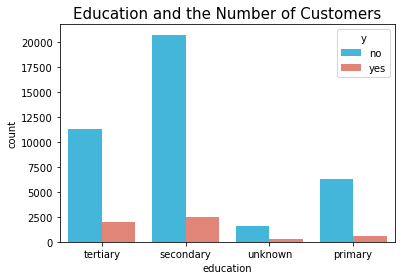

In [62]:
# Distribution of the education and the number of customers
sns.countplot(data=df, x='education', hue='y', palette=pres_pal)
plt.title('Education and the Number of Customers', fontsize=15);

In [54]:
# Distribution of the default and the number of customers
sns.countplot(data=df, x='default', hue='y', palette=pres_pal)
plt.title('Default and the Number of Customers', fontsize=15);

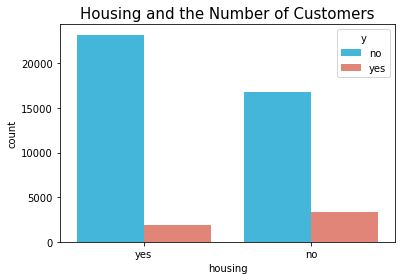

In [55]:
# Distribution of the housing and the number of customers
sns.countplot(data=df, x='housing', hue='y', palette=pres_pal)
plt.title('Housing and the Number of Customers', fontsize=15);

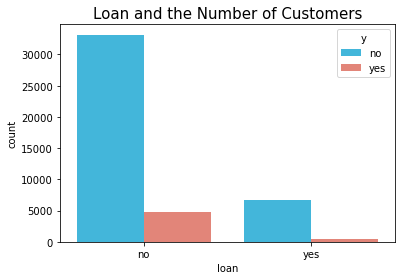

In [56]:
# Distribution of the loan and the number of customers
sns.countplot(data=df, x='loan', hue='y', palette=pres_pal)
plt.title('Loan and the Number of Customers', fontsize=15);

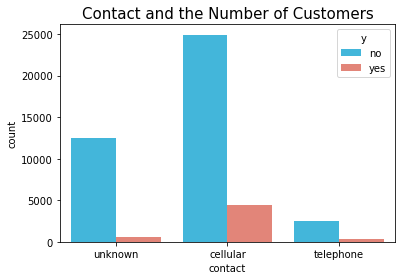

In [57]:
# Distribution of the contact and the number of customers
sns.countplot(data=df, x='contact', hue='y', palette=pres_pal)
plt.title('Contact and the Number of Customers', fontsize=15);

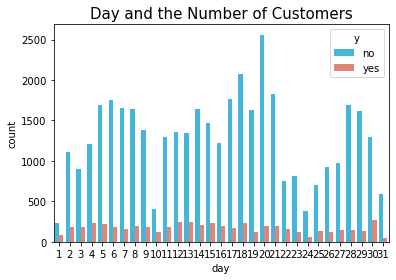

In [58]:
# Distribution of the day and the number of customers
sns.countplot(data=df, x='day', hue='y', palette=pres_pal)
plt.title('Day and the Number of Customers', fontsize=15);

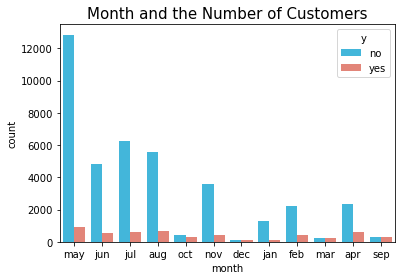

In [59]:
# Distribution of the month and the number of customers
sns.countplot(data=df, x='month', hue='y', palette=pres_pal)
plt.title('Month and the Number of Customers', fontsize=15);

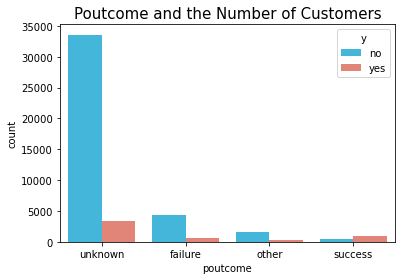

In [60]:
# Distribution of the poutcome and the number of customers
sns.countplot(data=df, x='poutcome', hue='y', palette=pres_pal)
plt.title('Poutcome and the Number of Customers', fontsize=15);

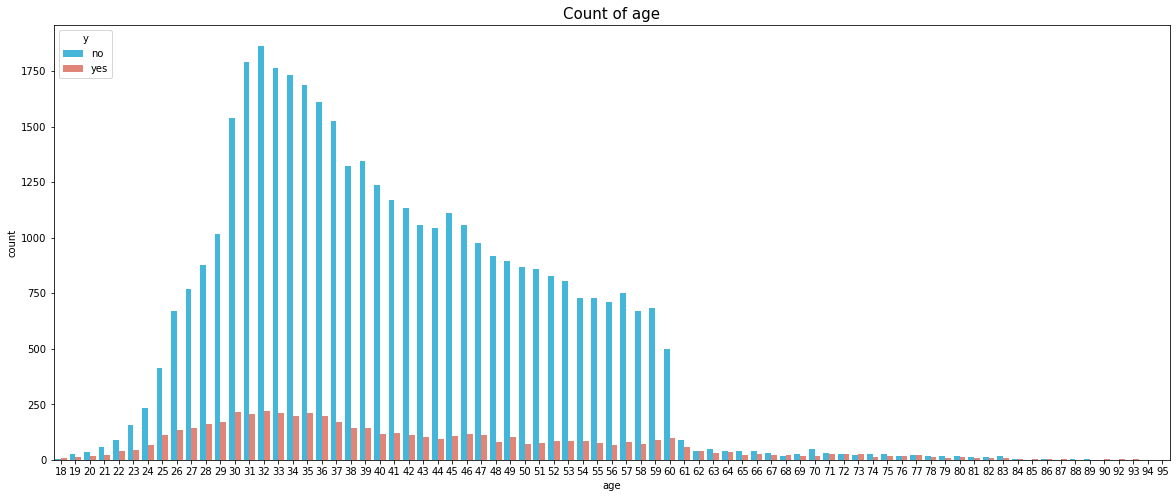

In [61]:
# Plotting the distribution graph of the age column
plt.figure(figsize=(20,8))
sns.countplot(data=df, x='age', hue='y', palette=pres_pal)
plt.title('Count of age', fontsize=15)
plt.show();

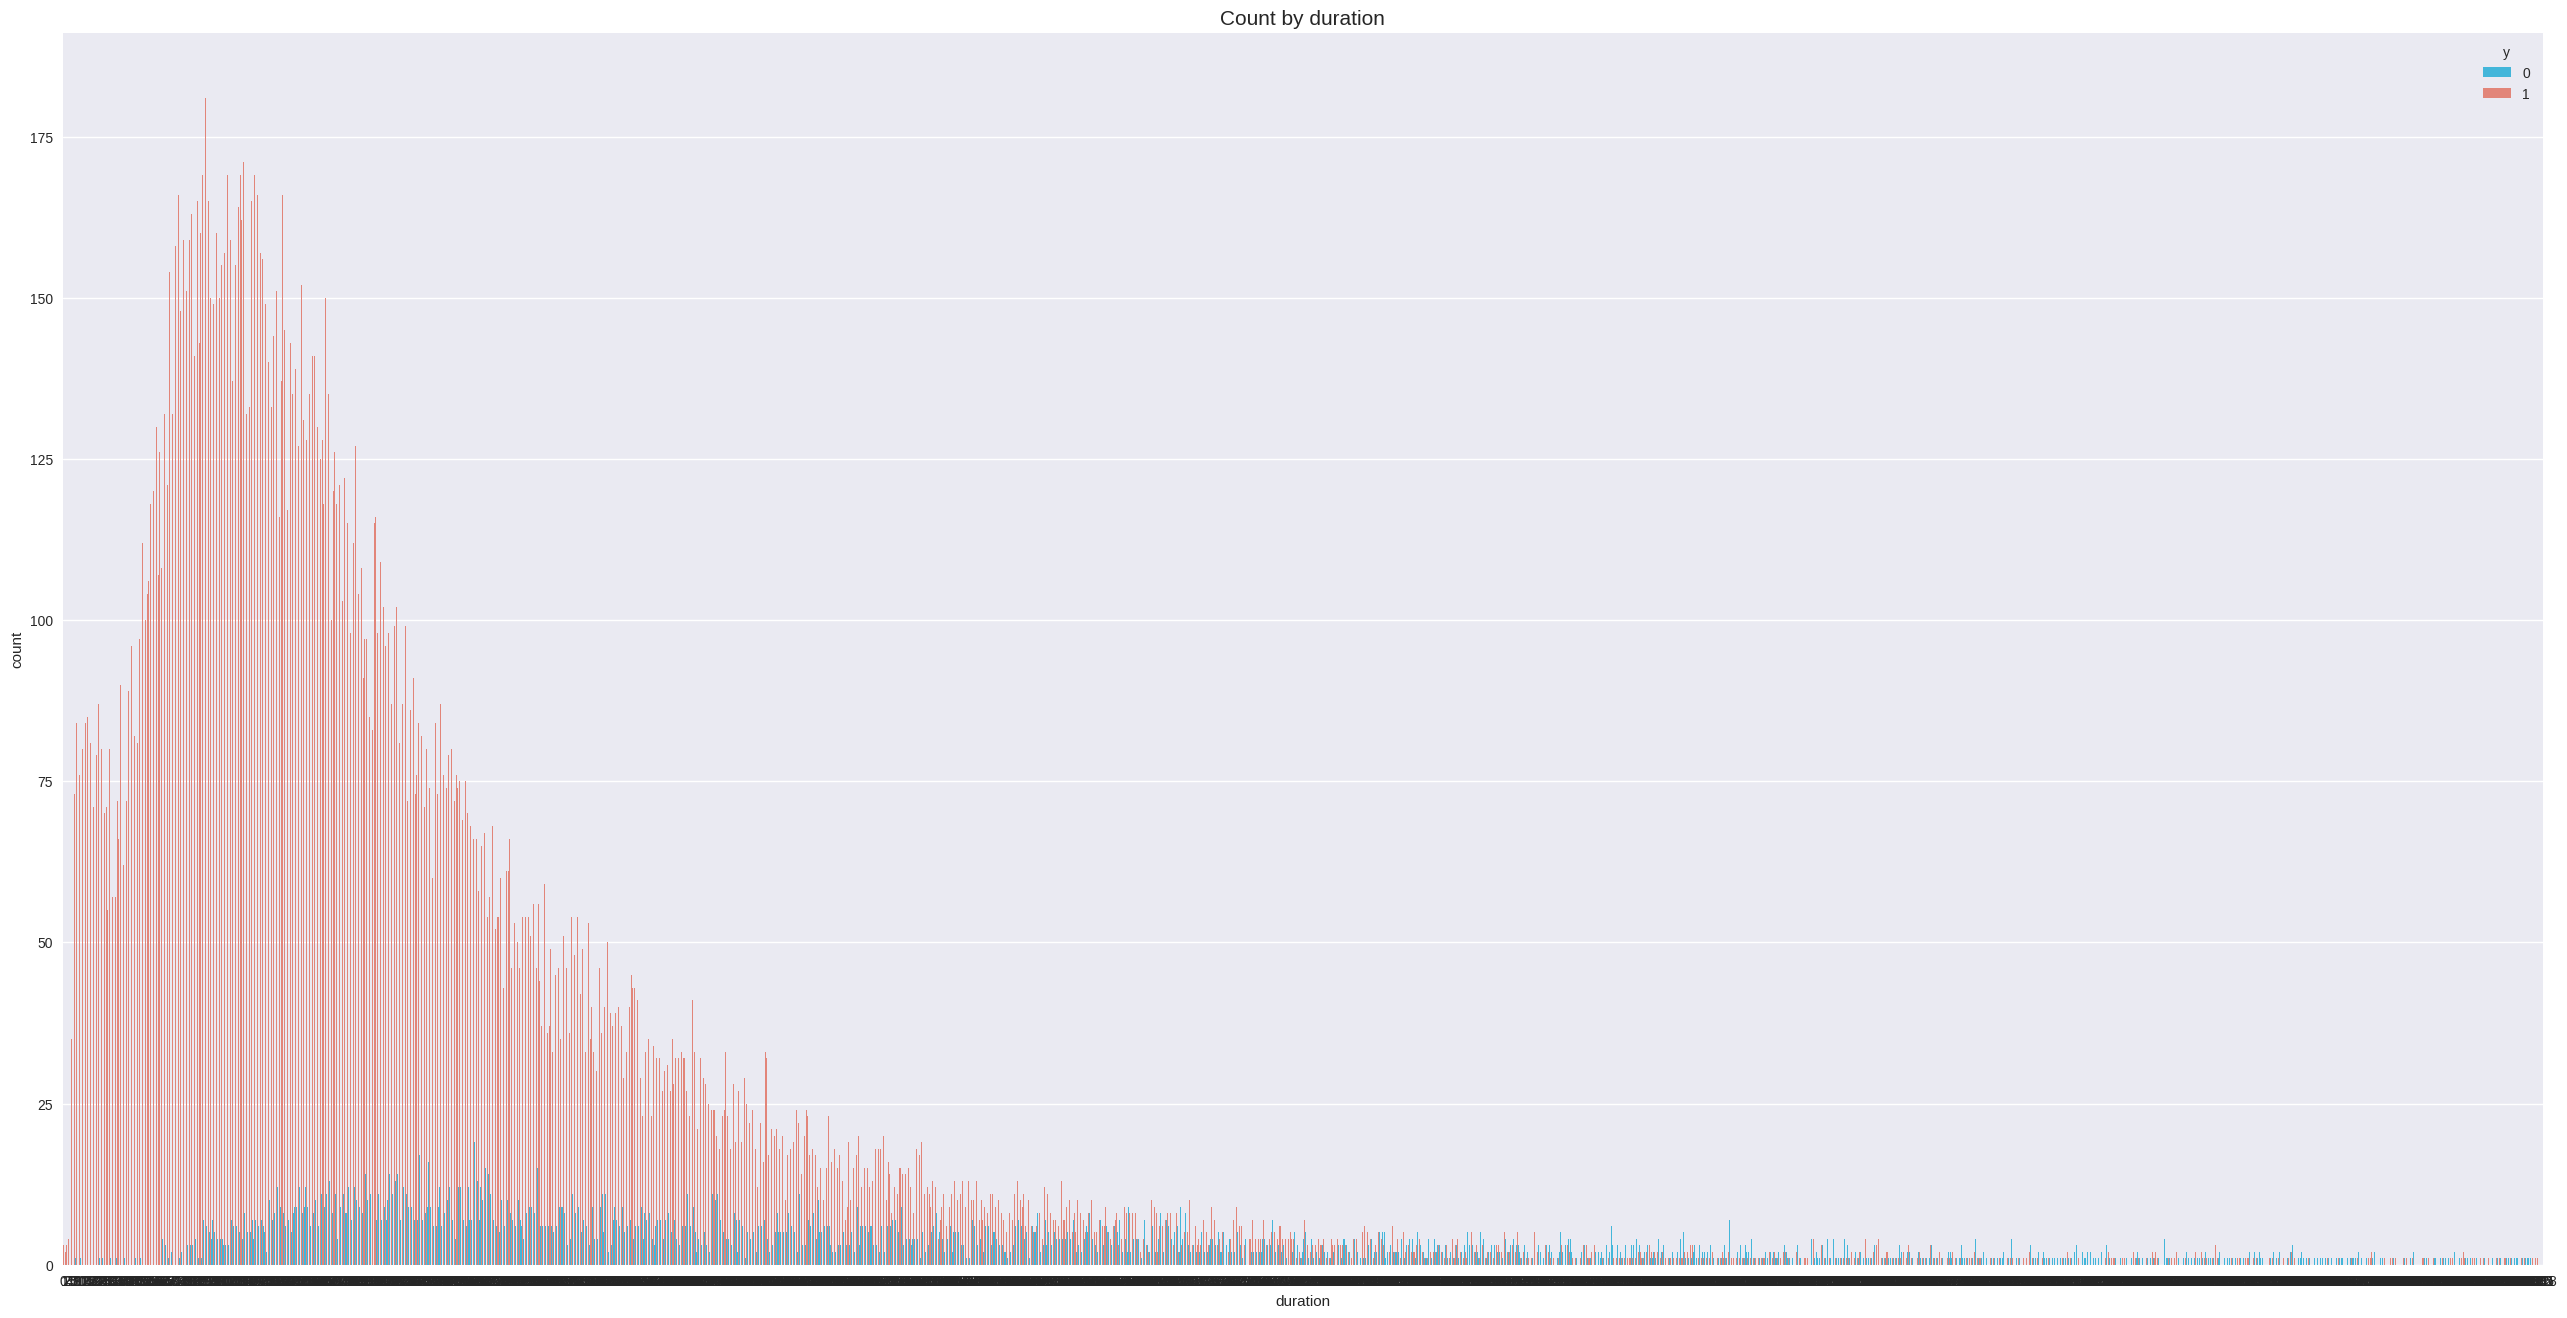

In [32]:
# Plotting the histographic view of the balance distribution for the 'balance' column
plt.figure(figsize=(32,16))
sns.countplot(data=df, x='duration', hue='y', palette=pres_pal)
plt.title('Count by duration', fontsize=15)
plt.show();

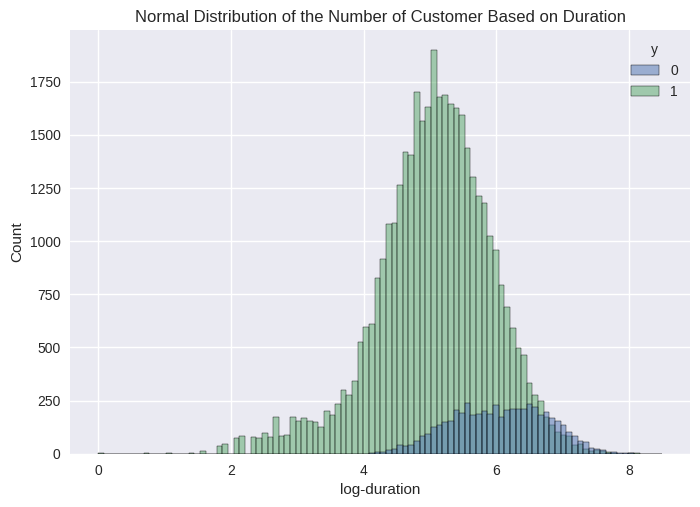

In [33]:
# Creating a new column to transform the right skewed distribution to a normal distribution using log
df['log-duration'] = np.log1p(df['duration'])

# A normal distribution of the number of customers for each usertype
sns.histplot(data=df,x='log-duration',hue='y',bins=100).set(title='Normal Distribution of the Number of Customer Based on Duration');

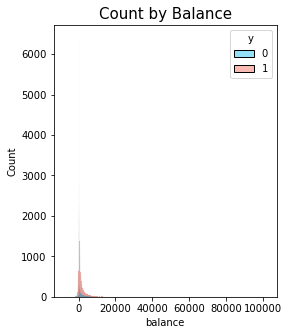

In [19]:
# Plotting the histographic view of the balance distribution for the 'balance' column
plt.figure(figsize=(4,5))
sns.histplot(data=df, x='balance', hue='y', palette=pres_pal)
plt.title('Count by Balance', fontsize=15)
plt.show();

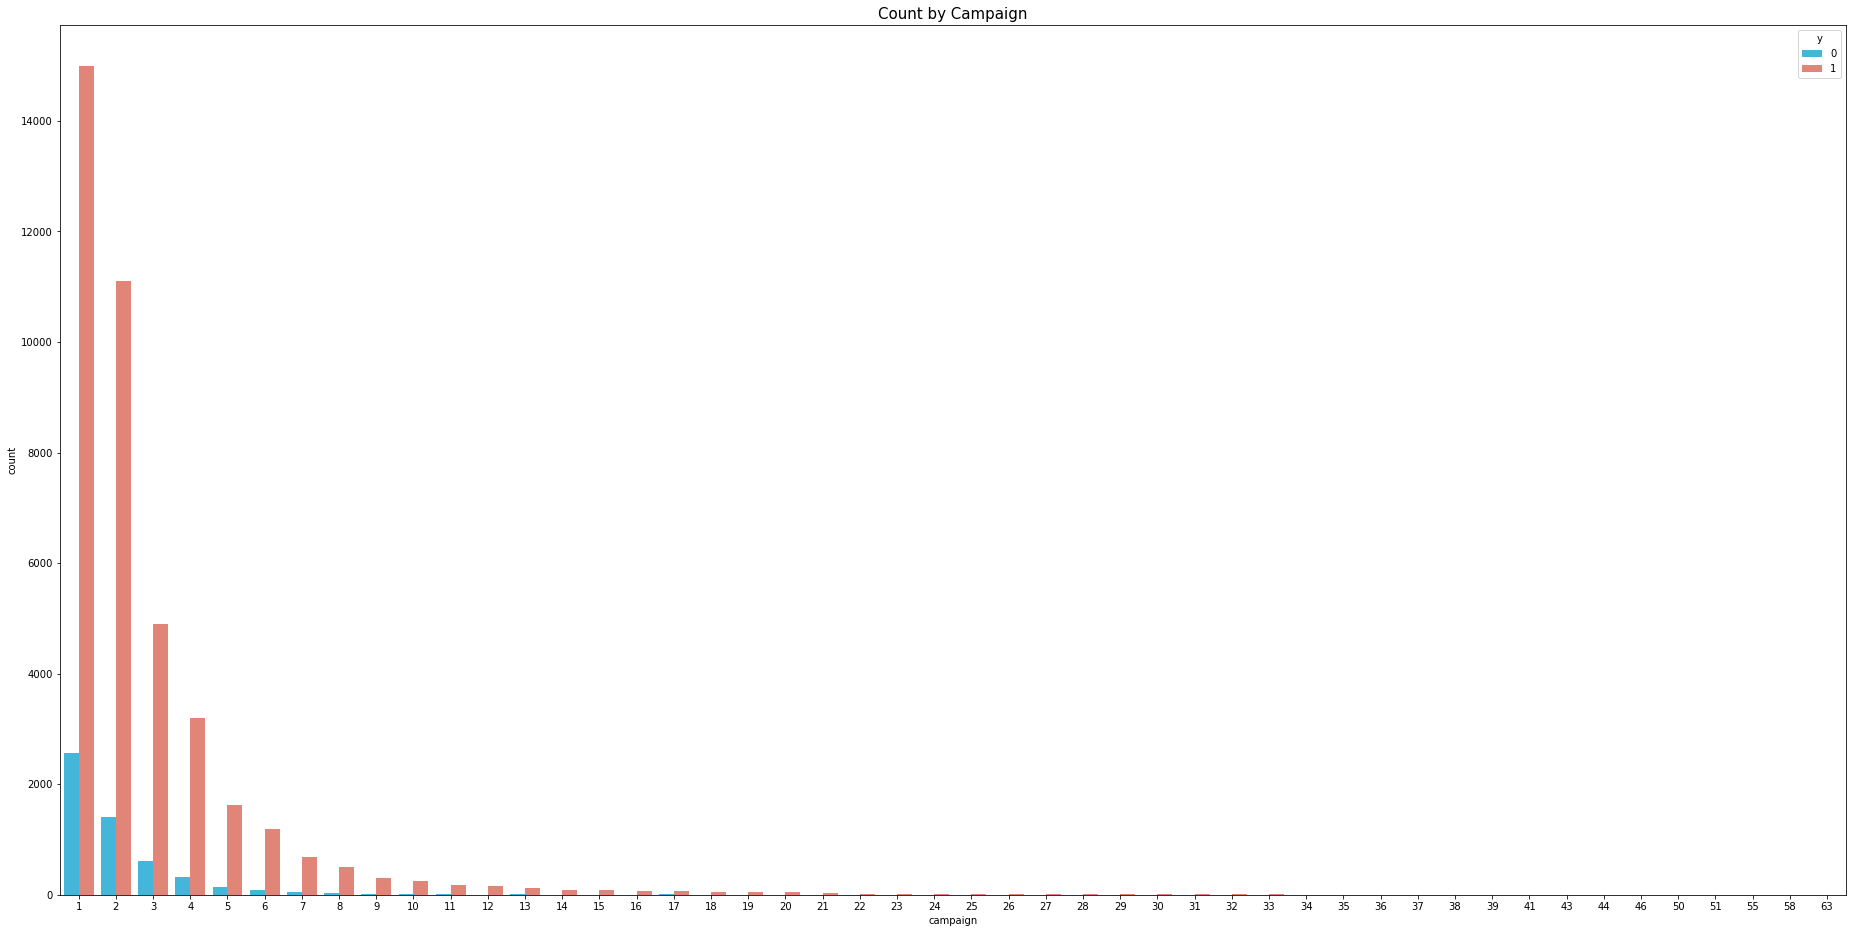

In [27]:
# Distribution of the subscribers and non-subscribers of the campaign column
plt.figure(figsize=(32,16))
sns.countplot(data=df, x='campaign', hue='y', palette=pres_pal)
plt.title('Count by Campaign', fontsize=15)
plt.show();

In [30]:
# Mean of the campaign
np.mean(df['campaign'])

2.763840658246887

In [31]:
# Median of the campaign
np.median(df['campaign'])

2.0

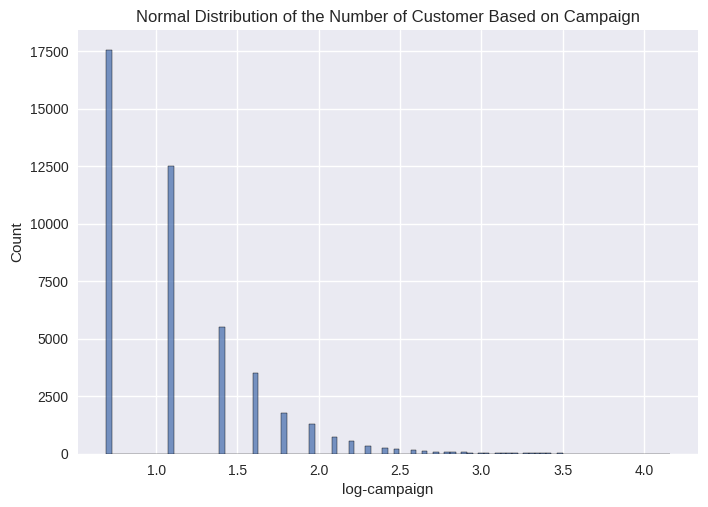

In [35]:
# Creating a new column to transform the right skewed distribution to a normal distribution using log
df['log-campaign'] = np.log1p(df['campaign'])

# A normal distribution of the number of customers for each usertype
sns.histplot(data=df,x='log-campaign',bins=100).set(title='Normal Distribution of the Number of Customer Based on Campaign');

The above is an example of trial and error on cases in which the application of log does not work. For the distribution of the campaign column to be presented in a better way because it has to either be left-skewed or right-skewed. The duration column is neither as it does not satisfy the formula to be left-skewed or right skewed.

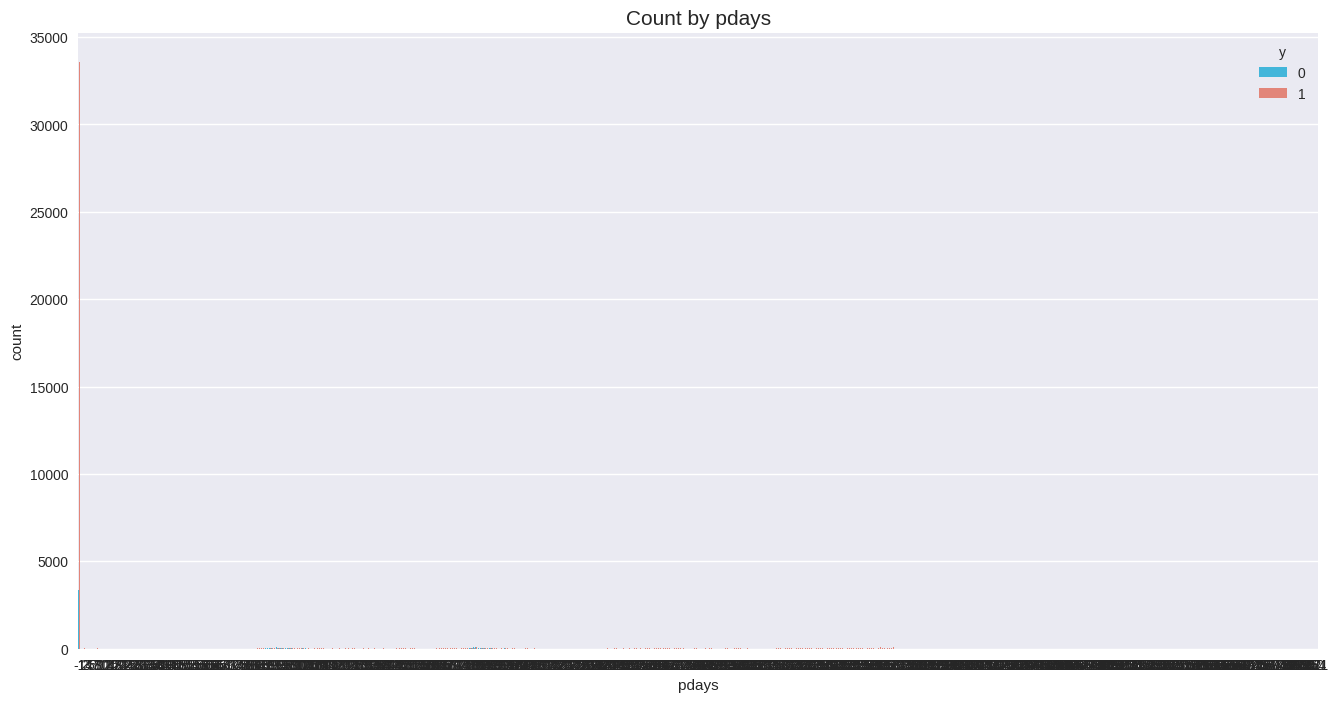

In [36]:
# Distribution of the pdays column
plt.figure(figsize=(16,8))
sns.countplot(data=df, x='pdays', hue='y', palette=pres_pal)
plt.title('Count by pdays', fontsize=15)
plt.show();

In [37]:
# Creating a new column to transform the right skewed distribution to a normal distribution using log
df['log-pdays'] = np.log1p(df['pdays'])

# A normal distribution of the number of customers for each usertype
sns.histplot(data=df,x='log-pdays',hue='y',bins=100).set(title='Normal Distribution of the Number of Customer Based on Pdays');

In [38]:
# Distribution of the column previous 
plt.figure(figsize=(32,16))
sns.countplot(data=df, x='previous', hue='y', palette=pres_pal)
plt.title('Count by previous', fontsize=15)
plt.show();

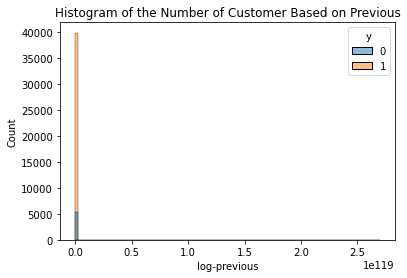

In [37]:
# Creating a new column to transform the right skewed distribution to a normal distribution using log
df['log-previous'] = np.exp(df['previous'])
   
sns.histplot(data=df,x='log-previous',hue='y',bins=100).set(title='Histogram of the Number of Customer Based on Previous');

In [38]:
# A normal distribution of the number of customers for each usertype
plt.hist(df['log-previous'])
plt.title('log distribution of the column previous')
plt.xlabel('Logarthmic Range')
plt.ylabel('Number of Customers');

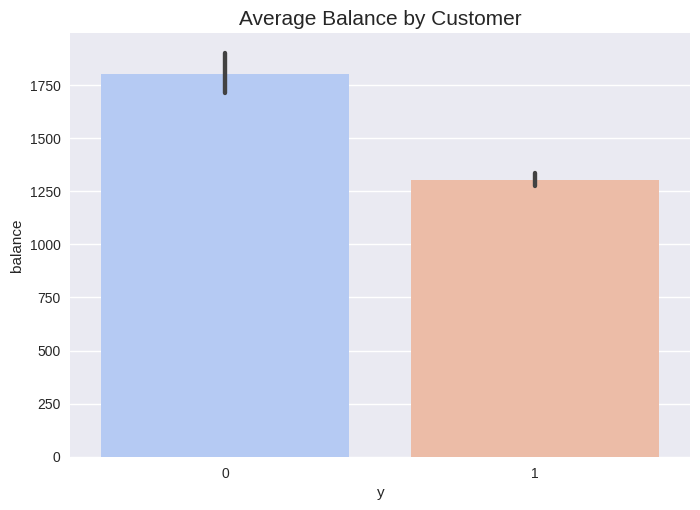

In [41]:
sns.barplot(x='y', y='balance', data=df, palette='coolwarm')
plt.title('Average Balance by Customer', fontsize=15);

# Model, Predict, and Evaluate 

In [42]:
# Evaluate our predictions
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs y_pred labels
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    results = {"accuracy": round(accuracy, 2),
               "precision": round(precision, 2), 
               "recall": round(recall, 2),
               "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return results

In [43]:
# This function will be used to plot ROC curves for model evaluation:
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='green', label='ROC')
    
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Guess')
    
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=15)
    plt.legend()
    plt.show()

In [44]:
# Column names to create features
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'log-duration', 'log-campaign',
       'log-pdays', 'log-previous'],
      dtype='object')

In [4]:
# The features for the machine learning model
features = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']

In [5]:
# Creating a dataframe for the features (x) and labels (y)
X = df[features]
y = df['y']

In [49]:
# Checking if all the respective values are convert into categorical
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [6]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [7]:
# Check the shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31647, 16), (13564, 16), (31647,), (13564,))

## Encoding Categorical Features to Run the Models

In [8]:
# encoding our label to use it in the machine learning model
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

In [9]:
# Classifying the features into categorical features, numerical features, and logarthmic features
cat_feature = [ 'job', 'marital',
       'education', 'default', 'housing', 'loan',
       'contact', 'day', 'month','poutcome' ]
num_feature = ['age','balance']
log_features= ['duration','campaign','pdays','previous']

In [10]:
# Define a custom function for outlier handling
def handle_outliers(x):
    # Detect outliers using a specific method, e.g. IQR
    Q1 = np.percentile(x, 25)
    Q3 = np.percentile(x, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Replace outliers with a specific value or perform another handling method
    x[(x < lower_bound) | (x > upper_bound)] = np.median(x)  # Example: replace outliers with median
    return x

In [11]:
# Creating a pipeline for encoding categorical values
cat_pipeline = Pipeline([
    ('te',TargetEncoder())
])

# Creating a pipeline for handling the outliers and transforming numerical values into log form for better visualization 
num_pipeline = Pipeline([
    ('ot',FunctionTransformer(func = handle_outliers)),
    ('sc',StandardScaler())
])

log_pipeline = Pipeline([
    ('ot',FunctionTransformer(func = handle_outliers)),
    ('sc',StandardScaler()),
    ('rs',FunctionTransformer( np.log1p,validate=True) )
])


# Using the ColumnTransformer to simultaneosuly run both categorical and numerical pipeline in the preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('cat',TargetEncoder(),cat_feature),
    ('num',num_pipeline,num_feature),
    ('log',log_pipeline,log_features)
],remainder='passthrough')


## Logistic Regression

In [55]:
# Creating a pipeline to simultaneosuly apply ColumnTransformer, RandomOverSampler, and LogisticRegression   
lr_pipe = Pipeline([
    ('pre',preprocessor),
    ('ros',RandomOverSampler()),
    ('lr',LogisticRegression())
])

In [56]:
# Fitting the data and predicting the data
lr_pipe.fit(X_train,y_train_enc)
y_ped = lr_pipe.predict(X_test)

# Printing the classification report to show accuracy level of the prediction
print(classification_report(y_test_enc,y_ped))

              precision    recall  f1-score   support

           0       0.28      0.77      0.41      1587
           1       0.96      0.73      0.83     11977

    accuracy                           0.74     13564
   macro avg       0.62      0.75      0.62     13564
weighted avg       0.88      0.74      0.78     13564



## Decision Trees

In [60]:
# Creating a pipeline to simultaneosuly apply ColumnTransformer, RandomOverSampler, and DecisionTreeClassifier   
dt_pipe = Pipeline([
    ('pre',preprocessor),
    ('ros',RandomOverSampler()),
    ('dtc',DecisionTreeClassifier())
])

In [61]:
# Fitting the data and predicting the data
dt_pipe.fit(X_train,y_train_enc)
y_ped = dt_pipe.predict(X_test)

# Printing the classification report to show accuracy level of the prediction
print(classification_report(y_test_enc,y_ped))

              precision    recall  f1-score   support

           0       0.38      0.37      0.37      1587
           1       0.92      0.92      0.92     11977

    accuracy                           0.85     13564
   macro avg       0.65      0.64      0.65     13564
weighted avg       0.85      0.85      0.85     13564



## Random Forest

In [57]:
# Creating a pipeline to simultaneosuly apply ColumnTransformer, RandomOverSampler, and Random Forest  
rfc_pipe = Pipeline([
    ('pre',preprocessor),
    ('ros',RandomOverSampler()),
    ('rfc',RandomForestClassifier())
])

In [58]:
# Fitting the data and predicting the data
rfc_pipe.fit(X_train,y_train_enc)
y_ped = rfc_pipe.predict(X_test)

# Printing the classification report to show accuracy level of the prediction
print(classification_report(y_test_enc,y_ped))

              precision    recall  f1-score   support

           0       0.58      0.40      0.47      1587
           1       0.92      0.96      0.94     11977

    accuracy                           0.90     13564
   macro avg       0.75      0.68      0.71     13564
weighted avg       0.88      0.90      0.89     13564



# Feature Importance

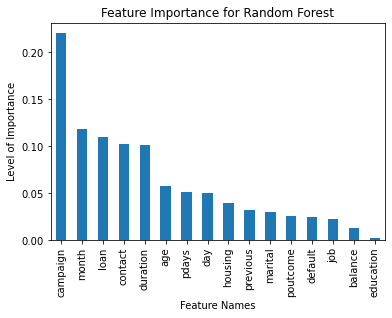

In [60]:
# Distribution of the feature importance
pd.Series(rfc_pipe.named_steps['rfc'].feature_importances_, index=X.columns).sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance for Random Forest')
plt.xlabel('Feature Names')
plt.ylabel('Level of Importance');

##  over fitting of the model

In [65]:
# Checking for the over fitting of the model
rf_scores = cross_val_score(rfc_pipe,X_train,y_train_enc,cv=5)

In [66]:
# The mean score of over fitting
rf_scores.mean()

0.8916168283762126

## XGBoost

In [67]:
# Creating a pipeline to simultaneosuly apply ColumnTransformer, RandomOverSampler, and XGBClassifier   
xgb_pipe = Pipeline([
    ('pre',preprocessor),
    ('ros',RandomOverSampler()),
    ('xgb',XGBClassifier())
])

In [68]:
# Fitting the data and predicting the data
xgb_pipe.fit(X_train,y_train_enc)
y_ped = xgb_pipe.predict(X_test)

# Printing the classification report to show accuracy level of the prediction
print(classification_report(y_test_enc,y_ped))

              precision    recall  f1-score   support

           0       0.35      0.71      0.47      1587
           1       0.95      0.83      0.89     11977

    accuracy                           0.81     13564
   macro avg       0.65      0.77      0.68     13564
weighted avg       0.88      0.81      0.84     13564



## Hyperparameter Tuning for Random Forest

In [38]:
# Creating a pipeline to simultaneosuly apply ColumnTransformer, RandomOverSampler, and RandomForestClassifier 
rfc_pipe = Pipeline([
    ('pre',preprocessor),
    ('ros',RandomOverSampler()),
    ('rfc',RandomForestClassifier())
])


In [39]:
# Initiating and assigning values to the parameters for tuning purposes
params = { 
    'rfc__n_estimators': [50,100,150],
    'rfc__min_samples_split':[2,4],
    'rfc__min_samples_leaf':[1,2]
    
}

# Assigning all the required parameters, number of folds, scoring, and error_score 
gd = GridSearchCV(rfc_pipe,params,cv=5,scoring='accuracy',error_score='raise')


In [40]:
# Fitting the X_train and y_train_enc into the grid search
gd.fit(X_train,y_train_enc)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         TargetEncoder(),
                                                                         ['job',
                                                                          'marital',
                                                                          'education',
                                                                          'default',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'day',
                                                                          'month',
                                                                          'poutcome']),
                                                                        ('num',
                                                                         Pipeline(steps=[('ot',
                                                                                          FunctionTransformer(func=<function handle_outliers at 0x000001BF357ACD30>)),
                                                                                         ('sc'...
                                                                                          FunctionTransformer(func=<function handle_outliers at 0x000001BF357ACD30>)),
                                                                                         ('sc',
                                                                                          StandardScaler()),
                                                                                         ('rs',
                                                                                          FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                                              validate=True))]),
                                                                         ['duration',
                                                                          'campaign',
                                                                          'pdays',
                                                                          'previous'])])),
                                       ('ros', RandomOverSampler()),
                                       ('rfc', RandomForestClassifier())]),
             param_grid={'rfc__min_samples_leaf': [1, 2],
                         'rfc__min_samples_split': [2, 4],
                         'rfc__n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [41]:
# Getting the best values of the parameters
gd.best_params_

{'rfc__min_samples_leaf': 1,
 'rfc__min_samples_split': 2,
 'rfc__n_estimators': 150}

In [42]:
# Prediction using the determined best parameters on X_test 
y_rd = gd.best_estimator_.predict(X_test)

In [43]:
# Printing the classification report to show accuracy level of the prediction
print(classification_report(y_test_enc,y_rd))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     11977
           1       0.58      0.39      0.47      1587

    accuracy                           0.90     13564
   macro avg       0.75      0.68      0.70     13564
weighted avg       0.88      0.90      0.89     13564



## Stacking

In [75]:
# Initiating the variable estimators to assign all the different kinds of models
estimators = [
    ('lr', lr_pipe),
    ('dtc', dt_pipe),
    ('rfc', rfc_pipe),
    ('xgb', xgb_pipe)
]

# Initializing the variable clf to assign the stacking classifier model with the estimators
clf = StackingClassifier(
    estimators=estimators
)

# Fitting the training data into the model
clf.fit(X_train, y_train_enc)



In [80]:
# Predictting the score of the testing data set
clf.score(X_test,y_test_enc)

0.9003243880861103

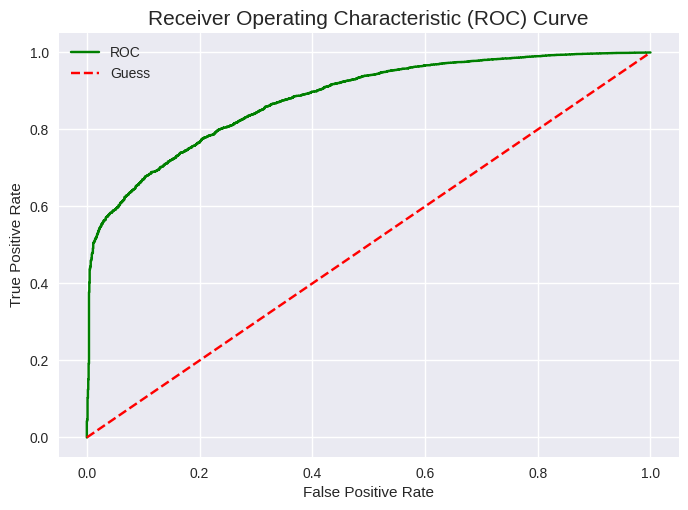

In [82]:
# Initializing the variable for predicting the data of X_test
clf_y_probs = clf.predict_proba(X_test)

clf_y_probs = clf_y_probs[:, 1]

# Using the function of roc_curve for getting the roc curve
fpr, tpr, thresholds = roc_curve(y_test, clf_y_probs)
# Plotting the roc_curve
plot_roc_curve(fpr, tpr)

# LIME

In [12]:
# Creating a pipeline to simultaneosuly apply ColumnTransformer, RandomOverSampler, and Random Forest  
rfc_pipe = Pipeline([
    ('pre',preprocessor),
    ('ros',RandomOverSampler()),
    ('rfc',RandomForestClassifier())
])

In [13]:
# Fitting the training data to predict it using training dataset
X_train_values = rfc_pipe.fit(X_train,y_train_enc)
y_ped = rfc_pipe.predict(X_test)

In [14]:
# Using the preprocessor to apply column transform on the training dataset for using it temporarily on LIME
X_train_temp = preprocessor.fit_transform(X_train,y_train_enc)
# Creating a new dataframe consisting of the transformed training dataset, columns and indexes of the X_train data set
X_train_prep = pd.DataFrame(X_train_temp, columns=X_train.columns, index=X_train.index)
# Viewing the data 
X_train_prep.head(3)

age       job  marital  education   default   balance   housing  \
13382  0.091351  0.099585  0.10666   0.118071  0.077844  0.126105  0.148950   
32641  0.091351  0.099585  0.10666   0.118071  0.077844  0.126105  0.148950   
3991   0.071512  0.151461  0.10666   0.118071  0.077844  0.126105  0.040659   

       loan   contact       day     month  duration  campaign     pdays  \
13382   9.0  0.093479  0.092603 -0.930461 -0.673850  0.270739 -0.836671   
32641  17.0  0.193176  0.092603 -0.553871 -0.017814 -2.415588 -0.836671   
3991   16.0  0.065747  0.092603 -1.589493 -0.416846 -2.415588 -0.280751   

       previous  poutcome  
13382 -0.365102 -0.348971  
32641 -0.365102 -0.348971  
3991  -0.365102 -0.348971

In [15]:
# Using the preprocessor to apply column transform on the testing dataset for using it temporarily on LIME
X_test_temp = preprocessor.transform(X_test)
# Creating a new dataframe consisting of the transformed training dataset, columns and indexes of the X_test data set
X_test_prep = pd.DataFrame(X_test_temp, columns=X_train.columns, index=X_test.index)
# Viewing the data
X_test_prep.head(3)

age       job   marital  education   default   balance   housing  \
37735  0.071512  0.123073  0.106660   0.118071  0.166167  0.126105  0.148950   
44332  0.151416  0.151461  0.150211   0.118071  0.166167  0.126105  0.148950   
4432   0.109665  0.099585  0.106660   0.118071  0.077844  0.126105  0.040659   

       loan   contact       day     month  duration  campaign     pdays  \
37735  14.0  0.065747  0.092603 -0.083134  2.613096 -2.415588 -0.836671   
44332  29.0  0.093479  0.124630 -0.553871 -0.156461  1.128357  0.336007   
4432   20.0  0.065747  0.092603 -0.271429  1.811649 -2.415588 -0.836671   

       previous  poutcome  
37735 -0.365102 -0.348971  
44332  1.612279  0.546988  
4432  -0.365102 -0.348971

In [16]:
# Handling the imbalanced data set using the Random Over Sampler method
ros = RandomOverSampler()
# Fitting the newly column transformed dataframe into the Random Over Sampler 
X_train_rs, y_train_rs = ros.fit_resample(X_train_prep,y_train_enc)

In [17]:
# Fitting in the new X_train and y_train after applying the random over sampler
rf =RandomForestClassifier()

rf.fit(X_train_rs,y_train_rs)

RandomForestClassifier()

In [18]:
# Predicting using the new dataframe of X-test
y_redc = rf.predict(X_test_prep)

In [19]:
# Creating a dataframe to showcase the values of the labels predicted by the model and the true values of the label 
test_predict = pd.DataFrame({'pred_label': pd.Series(y_redc, index=y_test.index), 'True_label': y_test_enc})

In [21]:
import lime
from lime.lime_tabular import LimeTabularExplainer

In [22]:
# Setup LIME object with feature / label names
explainer = LimeTabularExplainer(X_train_rs.values,
                                 feature_names=(X_train.columns.values),
                                 class_names=['non-Subscribed', 'Subscribed'])

In [23]:
# Values that dont match in predicted label and the true label
test_predict[test_predict['pred_label'] != test_predict['True_label']]

pred_label  True_label
37735           0           1
44332           0           1
38725           0           1
43340           1           0
41685           1           0
...           ...         ...
39554           0           1
18947           1           0
42196           0           1
24922           0           1
42163           0           1

[1429 rows x 2 columns]

In [27]:
# Data of the index 24062
X.loc[24062]

age                 42
job             admin.
marital         single
education    secondary
default             no
balance           -247
housing            yes
loan               yes
contact      telephone
day                 21
month              oct
duration           519
campaign             1
pdays              166
previous             1
poutcome         other
Name: 24062, dtype: object

In [28]:
# Picking a customer ID
cust_id = 24922

# Explanation of the 'Black box' model
exp = explainer.explain_instance(X_test_prep.loc[cust_id],rf.predict_proba)
exp.show_in_notebook()

In [101]:
# Picking a customer ID
cust_id = 43287
# Explanation of the 'Black box' model
exp = explainer.explain_instance(X_test_prep.loc[cust_id],rf.predict_proba)
exp.show_in_notebook()

# Deep Learning Model

In [103]:
# Initializing the MLP Classifier
nn = MLPClassifier((80, 80, 80, 80), activation='relu')

# Creating a pipeline to apply Column Transform, Random Over Sampler, and MLP Classifier
nn_pipe = Pipeline([
    ('preprocessor',preprocessor),
    ('ros', RandomOverSampler()),
    ('nnmodel',nn)
    ])

# Fitting in the training dataset
nn_pipe.fit(X_train, y_train_enc)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', TargetEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'day', 'month',
                                                   'poutcome']),
                                                 ('num',
                                                  Pipeline(steps=[('ot',
                                                                   FunctionTransformer(func=<function handle_outliers at 0x7f6373a52dd0>)),
                                                                  ('sc',
                                                                   StandardScaler())]),
                                                  ['age', 'balance']),
                                                 ('log',
                                                  Pipeline(steps=[('ot',
                                                                   FunctionTransformer(func=<function handle_outliers at 0x7f6373a52dd0>)),
                                                                  ('sc',
                                                                   StandardScaler()),
                                                                  ('rs',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                       validate=True))]),
                                                  ['duration', 'campaign',
                                                   'pdays', 'previous'])])),
                ('ros', RandomOverSampler()),
                ('nnmodel',
                 MLPClassifier(hidden_layer_sizes=(80, 80, 80, 80)))])

In [104]:
# Printing the classification report after running the pipeline
y_rd = nn_pipe.predict(X_test)
print(classification_report(y_test_enc,y_rd))

              precision    recall  f1-score   support

           0       0.30      0.53      0.38      1587
           1       0.93      0.83      0.88     11977

    accuracy                           0.80     13564
   macro avg       0.61      0.68      0.63     13564
weighted avg       0.86      0.80      0.82     13564



In [124]:
# Applying the sequential deep learning model
keras_model = Sequential()
keras_model.add(Dense(16, input_shape=(16,), activation='relu'))
keras_model.add(Dense(1, activation='softmax'))
keras_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
keras_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                272       
                                                                 
 dense_10 (Dense)            (None, 1)                 17        
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [120]:
# Creating two new dataframes of X_train and X_test after applying transformation
X_train_prd = pd.DataFrame(preprocessor.fit_transform(X_train,y_train_enc))
X_test_prd = pd.DataFrame(preprocessor.transform(X_test))

ros = RandomOverSampler()

# Fitting in the new dataframes into the Random over Sampler for adjusting the im,balanced dataset
X_train_rs,y_train_rs = ros.fit_resample(X_train_prd,y_train_enc)
X_train_rs

0        1         2         3         4         5         6   \
0      0.862557  0.89841  0.849919  0.882124  0.834022  0.873837  0.957440   
1      0.879781  0.85299  0.849919  0.882124  0.834022  0.873837  0.851713   
2      0.907703  0.89841  0.916217  0.882124  0.834022  0.930811  0.851713   
3      0.909297  0.85299  0.849919  0.882124  0.834022  0.873837  0.957440   
4      0.862557  0.85299  0.849919  0.882124  0.834022  0.873837  0.851713   
...         ...      ...       ...       ...       ...       ...       ...   
55885  0.926362  0.89841  0.855356  0.882124  0.922085  0.873837  0.851713   
55886  0.862557  0.89841  0.855356  0.882124  0.922085  0.930811  0.851713   
55887  0.862557  0.89841  0.849919  0.882124  0.834022  0.873837  0.851713   
55888  0.862557  0.89841  0.849919  0.882124  0.922085  0.873837  0.957440   
55889  0.880109  0.89841  0.894175  0.882124  0.834022  0.873837  0.851713   

         7         8         9         10        11        12        13  \
0      27.0  0.931478  0.908263 -0.931195 -0.371177  0.816304 -0.280238   
1       6.0  0.892906  0.908263 -1.308235  0.493112 -2.397595  0.337762   
2      17.0  0.909392  0.908263  0.954004  0.401956 -0.035169 -0.280238   
3       6.0  0.896505  0.908263  1.048264 -0.678405 -2.397595 -0.280238   
4      23.0  0.539216  0.908263 -1.402495  2.788879 -2.397595 -0.838169   
...     ...       ...       ...       ...       ...       ...       ...   
55885  30.0  0.808470  0.908263  0.294185 -0.512975 -2.397595 -0.838169   
55886  16.0  0.539216  0.908263 -0.554155 -0.512975 -2.397595 -0.838169   
55887  12.0  0.898275  0.871586 -0.836935 -0.512975  0.680896 -0.838169   
55888  16.0  0.931478  0.908263 -0.742675  0.243278 -2.397595 -0.838169   
55889  19.0  0.892906  0.908263  1.519564 -0.512975 -2.397595  0.337762   

             14        15  
0     -0.366264 -0.355963  
1     -0.366264 -0.355963  
2     -0.366264 -0.355963  
3     -0.366264 -0.355963  
4     -0.366264 -0.355963  
...         ...       ...  
55885 -0.366264 -0.355963  
55886 -0.366264 -0.355963  
55887  1.061435  1.197042  
55888 -0.366264 -0.355963  
55889 -0.366264 -0.355963  

[55890 rows x 16 columns]

In [125]:
# Printing the history after fitting in the new dataframes into the sequential deep learning model
history = keras_model.fit(X_train_rs,y_train_rs, epochs=20)

Epoch 1/20
1747/1747 [==============================] - 3s 1ms/step - loss: 0.5571 - accuracy: 0.5000
Epoch 2/20
1747/1747 [==============================] - 2s 1ms/step - loss: 0.5255 - accuracy: 0.5000
Epoch 3/20
1747/1747 [==============================] - 2s 1ms/step - loss: 0.5044 - accuracy: 0.5000
Epoch 4/20
1747/1747 [==============================] - 2s 1ms/step - loss: 0.4907 - accuracy: 0.5000
Epoch 5/20
1747/1747 [==============================] - 2s 1ms/step - loss: 0.4843 - accuracy: 0.5000
Epoch 6/20
1747/1747 [==============================] - 2s 1ms/step - loss: 0.4800 - accuracy: 0.5000
Epoch 7/20
1747/1747 [==============================] - 2s 1ms/step - loss: 0.4773 - accuracy: 0.5000
Epoch 8/20
1747/1747 [==============================] - 2s 1ms/step - loss: 0.4749 - accuracy: 0.5000
Epoch 9/20
1747/1747 [==============================] - 2s 1ms/step - loss: 0.4735 - accuracy: 0.5000
Epoch 10/20
1747/1747 [==============================] - 2s 1ms/step - loss: 0.472

In [127]:
# Plotting the loss vs accuracy graph
keras_model.history.history
pd.DataFrame(keras_model.history.history).plot();

Therefore the highest accuracy was 90 % which resulted in the first attempt. After hyperparameter tuning the accuracy is 90%. The deep learning techniques such as MLP Classifier and Sequential which resulted in an lower accuracy of 80% and 50%, respectively.